In [1]:
#loading the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.isnull().sum()
data.dropna(inplace = True)
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [3]:
data.drop(columns = ['customerID'], inplace=True)
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

#convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(data)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [4]:


df_dummies.dropna(inplace = True)

In [5]:
df_dummies.isnull().sum()
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [6]:
df_dummies.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [7]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
# Running logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\shataria\Desktop\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8061611374407583


In [10]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(X_test), average=None)

array([0.87357032, 0.58477157])

In [11]:
print(model.coef_[0])
print(X_train.columns)

[ 2.92082976e-01 -5.86643906e-02  3.25421116e-03  3.00325799e-04
 -6.18944586e-02 -8.75563031e-02 -6.48426449e-02 -8.46081168e-02
 -1.69706688e-02 -1.32480093e-01  1.09208667e-01 -2.58659429e-01
 -1.98115971e-01  1.09208667e-01 -6.05434578e-02 -3.84395221e-01
  3.53052859e-01 -1.18108400e-01  1.86618275e-01 -1.18108400e-01
 -2.17960637e-01  5.11472675e-02 -1.18108400e-01 -8.24896296e-02
  3.07789009e-02 -1.18108400e-01 -6.21212630e-02  2.04508375e-01
 -1.18108400e-01 -2.35850737e-01 -1.42018302e-01 -1.18108400e-01
  1.10675940e-01 -5.75773996e-02 -1.18108400e-01  2.62350375e-02
  6.04051074e-01 -2.16919098e-01 -5.36582738e-01 -1.93676538e-01
  4.42257766e-02 -7.34947810e-02 -1.49285052e-01  2.07565558e-01
 -1.34236486e-01]
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_N

AxesSubplot(0.125,0.125;0.775x0.755)


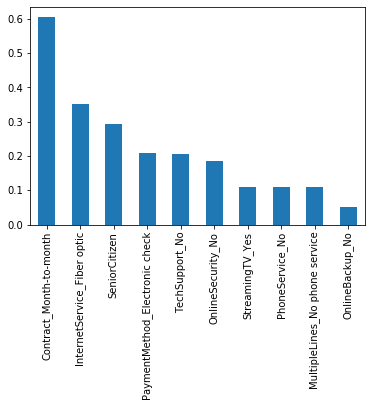

In [12]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


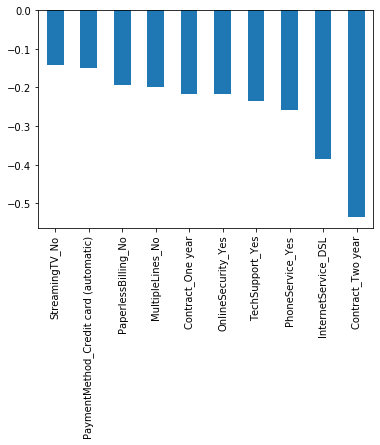

In [13]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))


0.8088130774697939


In [15]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(X_test), average=None)

array([0.87662338, 0.59574468])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [17]:
#SVM
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8194740582800284

In [18]:

# F1 score
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(X_test), average=None)

array([0.88276506, 0.62704309])

In [20]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

In [21]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(X_test), average=None)

array([0.88091954, 0.59467919])

## Finding

1. Here you can see that SVN is the best performing model. It even performed well in predicting the people who did not churn.
2. We also find out as we had guessed in our EDA that month to month contract , Internet Service Fiber optics, payment method electronic check are positive contributors which result in the customer churning.
3. Also 2 year contract , DSL service , phone service, tech support call result in the customer not churning and hence are overall positive for the company.